In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pr = pd.read_csv('protests.csv')
pr.describe()

,Attendees,Total Articles
count,20398.000000,32523.000000
mean,708.660408,2.797589
std,9904.943929,11.095795
min,0.000000,1.000000
25%,30.000000,1.000000
50%,100.000000,1.000000
75%,200.000000,2.000000
max,725000.000000,923.000000


4. In which location were the most frequent events mentioned?

In [3]:
# find the most frequent event (only the most frequent event is chosen here as there're a larger amount of data)
cnt = pr.groupby(['Event'],as_index=False)['Event'].agg({'Frequency':'count'})
cnt_1 = cnt.sort_values(by=['Frequency'], ascending=False).head(1)

In [9]:
cnt_10 = cnt.sort_values(by=['Frequency'], ascending=False).head(10)
cnt_10.set_index(['Event'], inplace=True)
cnt_10.to_csv('Qustion4.csv', encoding='utf-8')

cnt_10

,Frequency
Event,
Racial Injustice,7284
Other,2113
Immigration,2089
Civil Rights,1777
Executive,1594
Healthcare,1341
Guns,1340
Guns (National Walkout Day),1307
Collective Bargaining,1296


In [10]:
# choose data from protests.csv and save them into a new dataframe named 'r_4'
evt = list(cnt_1['Event'])
r_4 = pd.DataFrame(columns = ['Date', 'Location', 'Attendees', 'Event', 'Tags', 'Curated', 'Source', 'Total Articles'])
for e in evt:
    result = pr.loc[pr['Event'] == e]
    r_4 = r_4.append(result)

r_4

,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles
7,2017/1/20,"University of Washington, Seattle, WA",NaN,Racial Injustice,Civil Rights; For racial justice; Against invi...,Yes,http://komonews.com/news/local/woman-says-she-...,2
470,2017/1/26,"Ped Mall, Iowa City, IA",30.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://fox59.com/2017/01/30/fedex-backs-driver...,1
807,2017/2/7,"Lebanon Valley College, Annville, PA",50.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://abc27.com/2017/02/07/protestors-push-fo...,1
840,2017/2/9,"University of Michigan, Ann Arbor, MI",150.0,Racial Injustice,Civil Rights; For racial justice; For religiou...,Yes,https://www.michigandaily.com/section/news/stu...,1
987,2017/2/13,"Charlottesville, VA",NaN,Racial Injustice,Civil Rights; For racial justice; Against Conf...,Yes,http://www.wcyb.com/news/politics/va-gubernato...,1
...,...,...,...,...,...,...,...,...
32499,2020/8/18,"East Liberty, Pittsburgh, PA",300.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.wtae.com/article/watch-live-protes...,5
32500,2020/8/18,"Portland, OR",200.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://apnews.com/d640afdd85404f0b7ffde44eb75...,7
32514,2020/8/19,"Rock County Courthouse, Janesville, WI",15.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.gazettextra.com/news/local/residen...,1
32520,2020/8/19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1


In [11]:
# extract the 50 Racial Injustice protests with most attendees and create a new dataframe 'ri_50'
ri_50 = r_4.sort_values(by=['Attendees'], ascending=False).head(50)
ri_50 = ri_50.reset_index()
ri_50

,index,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles
0,16065,2019/1/21,"San Antonio, TX",300000.0,Racial Injustice,Civil Rights; For racial justice; Martin Luthe...,Yes,https://www.kens5.com/article/news/east-side-w...,3
1,22698,2020/1/20,"Pittman-Sullivan Park, San Antonio, TX",100000.0,Racial Injustice,Civil Rights; For racial justice; Martin Luthe...,Yes,https://www.mysanantonio.com/news/local/articl...,5
2,28774,2020/6/12,"Seattle, WA",60000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.seattletimes.com/seattle-news/seat...,11
3,26977,2020/6/5,"Houston, TX",60000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,http://www.salamancapress.com/houston-hip-hop-...,2
4,25962,2020/6/2,"Houston, TX",25000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.washingtonpost.com/local/new-fenci...,33
5,27424,2020/6/6,"Union Park, Chicago, IL",20000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.chicagotribune.com/news/breaking/c...,5
6,27954,2020/6/7,"Hollywood, Los Angeles, CA",20000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.latimes.com/california/story/2020-...,5
7,25660,2020/6/1,"Oakland, CA",15000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.sfchronicle.com/bayarea/article/Cr...,14
8,29214,2020/6/14,"Brooklyn, NY",15000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.kiro7.com/news/trending/thousands-...,5
9,27696,2020/6/6,"Civic Center Park, Berkeley, CA",12000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.dailycal.org/2020/06/07/we-wont-st...,7


In [7]:
# split the locations and switch its orders to extract information on state and towns
loc = ri_50['Location'].str.split(',', -1)

cleaned_addr = []
for l in list(loc):
    if len(l) == 2:
        l[0],l[1] = l[1],l[0]
        cleaned_addr.append(l)
    if len(l) == 3:
        l[0],l[1],l[2] = l[2],l[1],l[0]
        cleaned_addr.append(l)

In [12]:
columns = ['State','City','Address']
addr = pd.DataFrame(cleaned_addr[0:], columns = columns)
addr

,State,City,Address
0,TX,San Antonio,None
1,TX,San Antonio,Pittman-Sullivan Park
2,WA,Seattle,None
3,TX,Houston,None
4,TX,Houston,None
5,IL,Chicago,Union Park
6,CA,Los Angeles,Hollywood
7,CA,Oakland,None
8,NY,Brooklyn,None
9,CA,Berkeley,Civic Center Park


In [16]:
# add columns of 'addr' into dataframe 'ri_50'
ri_50['State'] = ''
ri_50['City'] = ''
ri_50['Address'] = ''

ri_50['State'] = addr['State']
ri_50['City'] = addr['City']
ri_50['Address'] = addr['Address']
ri_50

,index,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles,State,City,Address
0,16065,2019/1/21,"San Antonio, TX",300000.0,Racial Injustice,Civil Rights; For racial justice; Martin Luthe...,Yes,https://www.kens5.com/article/news/east-side-w...,3,TX,San Antonio,None
1,22698,2020/1/20,"Pittman-Sullivan Park, San Antonio, TX",100000.0,Racial Injustice,Civil Rights; For racial justice; Martin Luthe...,Yes,https://www.mysanantonio.com/news/local/articl...,5,TX,San Antonio,Pittman-Sullivan Park
2,28774,2020/6/12,"Seattle, WA",60000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.seattletimes.com/seattle-news/seat...,11,WA,Seattle,None
3,26977,2020/6/5,"Houston, TX",60000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,http://www.salamancapress.com/houston-hip-hop-...,2,TX,Houston,None
4,25962,2020/6/2,"Houston, TX",25000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.washingtonpost.com/local/new-fenci...,33,TX,Houston,None
5,27424,2020/6/6,"Union Park, Chicago, IL",20000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.chicagotribune.com/news/breaking/c...,5,IL,Chicago,Union Park
6,27954,2020/6/7,"Hollywood, Los Angeles, CA",20000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.latimes.com/california/story/2020-...,5,CA,Los Angeles,Hollywood
7,25660,2020/6/1,"Oakland, CA",15000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.sfchronicle.com/bayarea/article/Cr...,14,CA,Oakland,None
8,29214,2020/6/14,"Brooklyn, NY",15000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.kiro7.com/news/trending/thousands-...,5,NY,Brooklyn,None
9,27696,2020/6/6,"Civic Center Park, Berkeley, CA",12000.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.dailycal.org/2020/06/07/we-wont-st...,7,CA,Berkeley,Civic Center Park


In [13]:
# convert 'ri_50' into a new csv
ri_50.to_csv('q4_cleaned.csv', encoding='utf-8')

In [ ]:
# Coordinate for each event is added into the 'ri_50' dataframe in Florish, 
#   using the Flourish dataset about coordinates for every states (in the US map format)

6. What type of protests were common at universities/colleges versus high schools?

In [17]:
# (all files named as Question 7 is for Question 6 in the final version)
uni = pr[pr['Location'].str.contains('University' or 'College')]
hs = pr[pr['Location'].str.contains('High School')]

In [20]:
tpu = uni.groupby(['Event'],as_index=False)['Event'].agg({'University and College':'count'})
tpu_1 = tpu.sort_values(by=['University and College'], ascending=False).head(10)

tph = hs.groupby(['Event'],as_index=False)['Event'].agg({'High School':'count'})
tph_1 = tph.sort_values(by=['High School'], ascending=False).head(10)

tpu_1

,Event,University and College
80,Racial Injustice,164
14,Collective Bargaining,95
0,Civil Rights,82
17,Education,69
59,Other,67
49,Immigration,63
30,Environment,49
45,Guns (National Walkout Day),29
53,International Relations,27
40,Executive (Supreme Court Nomination),27


In [19]:
tph_1

,Event,High School
30,Guns (National Walkout Day),888
27,Guns,429
10,Education,101
44,Racial Injustice,68
24,Environment,46
15,Education (Funding),30
31,Guns (Second Amendment),26
0,Civil Rights,26
8,Collective Bargaining,24
39,Other,23


In [49]:
# merge results and create sns plot
result_7 = pd.merge(tph_1, tpu_1, how='outer', on=['Event'])
result_7.set_index(['Event'], inplace=True)

In [54]:
result_7.to_csv('Q7.csv', encoding='utf_8')

Text(0, 0.5, 'Frequency')

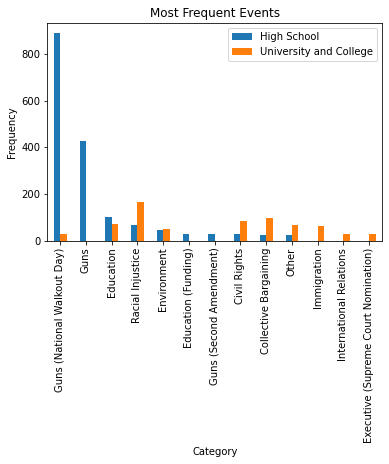

In [53]:
plt7 = result_7.plot(kind = 'bar', title = 'Most Frequent Events')
plt7.set_xlabel('Category')
plt7.set_ylabel('Frequency')

In [9]:
tpu.to_csv('Q7_tpu_full.csv', encoding='utf_8')
tph.to_csv('Q7_tph_full.csv', encoding='utf_8')

In [ ]:
# Visualizations were made in Flourish